# Scattering cross section

- [Form factor](#Theory)
- [Cross section](#cross-section)
- [Multislice](#multislice)

In [92]:
from utils import*
from scattering import scattering_factors as scat
kwargs=dict(figsize=(10,5))
keV=200

## Form factor
In the far field, the wave function can usually be approximated as : 
\begin{equation}
    \Psi(\mathbf r) = e^{2i\pi k_0z} + \frac{e^{2i\pi kr}}{r}f(\theta)
\end{equation}
where $f(\theta)$ is the scattering amplitude also called the form factor in crystallography.

Using Born approximation the form factor are approximated as :
\begin{equation}
    f_e(\mathbf q)=\frac{2\pi me}{h^2}\int V(\mathbf r)e^{2i\pi\mathbf q\cdot\mathbf r}d^3r
\end{equation}
where $V$ is the electrostatic potential and 
$\mathbf q=\mathbf k-\mathbf k_0$ is the transfer vector momentum whose norm is related to $\theta$ as $q=2/\lambda\sin(\theta/2)$.


The form factors have been parametrized using Mott-Bethe formula for all the atoms [Kirkland](#kirkland) as : 
\begin{equation}
    f_e(q) = \sum_{i=1}^{3}\frac{a_i}{q^2+b_i} +  \sum_{i=1}^{3}{c_i}e^{-d_iq^2}
\end{equation}


At 200keV, we recall $\lambda=0.025 A$.

/home/tarik/Documents/git/mygit/utilities/utils/displayStandards.py:749: UserWarning: Matplotlib is currently using GTK3Agg, which is a non-GUI backend, so cannot show the figure.
  if 'p' in opt : ax.figure.show()


(<Figure size 960x480 with 1 Axes>,
 <AxesSubplot:xlabel='$\\theta(^{\\circ})$', ylabel='$f_e(\\AA)$'>)

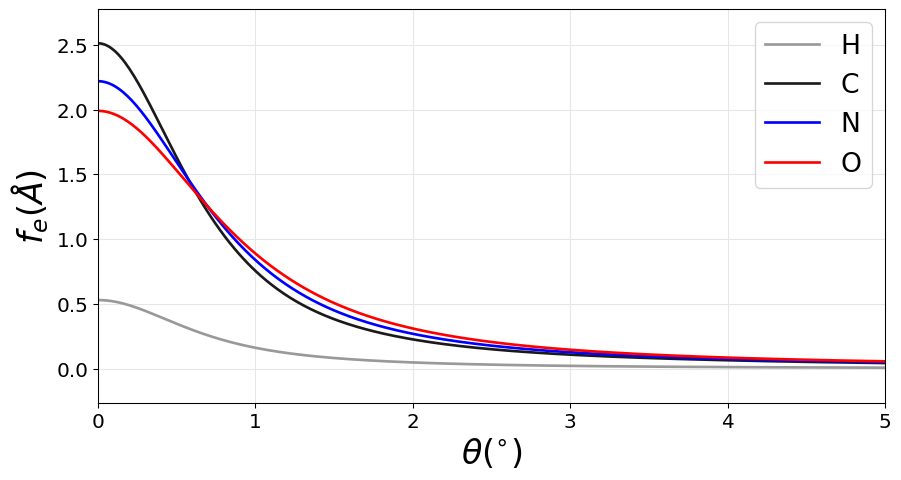

In [93]:
q = np.linspace(0,10,1000)
lam=cst.keV2lam(keV)
theta=2*np.arcsin(q*lam/2)

atoms=[
    ['H',1,(0.6,)*3,'Hydrogen'],
    ['C',6,(0.1,)*3,'Carbone'],
    ['N',7,'b','Nitrogen'],
    ['O',8,'r','Oxygen'],
]
df=pd.DataFrame(atoms,columns=['Za','Z','color','atom'])
df=df.set_index('Za')

x_ax='theta'
if x_ax=='q':
    x,xlab=q,'$q(\AA^{-1})$'
elif x_ax=='theta':
    x,xlab=np.rad2deg(theta),r'$\theta(^{\circ})$'

fe=scat.get_fe(Zs=df.Z.values.astype(int),q=q)
df['fe']=[f.tolist() for f in fe.T]

plts=[[x,r.fe,r.color,'%s' %r.name,2] for i,r in df.iterrows()]
dsp.stddisp(plts,labs=[xlab,'$f_e(\AA)$'],xylims=['x',0,5],**kwargs)


### cross section
The differential cross section is simply deduced as the square of the form factor. Its integration yields the total cross section (in $A^2$) : 
\begin{eqnarray}
    \sigma 
        &=& \int |f(\theta)|^2 d\Omega \\
        &=& 2\pi\int_0^{\pi}|f(\theta)|^2\sin(\theta)d\theta
\end{eqnarray}

As seen belowe the cross sections at 200keV for the most common atoms found in organic compounds are on the order of $\sigma=0.03A^2$.

In [94]:
t=(theta[1:]+theta[0:-1])/2
dt=theta[1:]-theta[0:-1]
df['sig']=[np.array(fe)**2 for fe in df.fe]
df['sig_tot(A^2)'] = [2*np.pi*np.sum((sig[1:]+sig[0:-1])/2*np.sin(t)*dt) for sig in df.sig]

print(df[['sig_tot(A^2)']].to_string())


    sig_tot(A^2)
Za              
H       0.000117
C       0.002602
N       0.002789
O       0.002932


## Multislice